## Visualizing Time Series Data 
Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

- One bar graph has 24 bars; each bar is the average across all days for that hour​
- one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.


Submit the .ipynb file containing the analysis and the generated pictures.​

Include the assignment description in a markdown cell at the top of your notebook.

I chose the data from the source for 3/15/2024 to 3/31/2024, which is 15 days, this data was split into 3 csv files. 

In [144]:
import pandas as pd
import glob

Combing csv Files: https://www.geeksforgeeks.org/how-to-merge-multiple-excel-files-into-a-single-files-with-python/

In [145]:
path = r'TSdata'

In [146]:
file_list = glob.glob(path + "/*.csv")

In [147]:
csv_list = []

In [148]:
for file in file_list:
    df = pd.read_csv(file)
    csv_list.append(df)

In [173]:
merged_csv = pd.concat(csv_list, ignore_index=True)
print(merged_csv)

                 HDR  ROLLING SYSTEM DEMAND
0     20240315000000                25361.0
1     20240315000500                25554.0
2     20240315001000                25533.0
3     20240315001500                25567.0
4     20240315002000                25533.0
...              ...                    ...
4862  20240328222000                28426.0
4863  20240328222500                28217.0
4864  20240328223000                28190.0
4865  20240328223500                28113.0
4866            2000                    NaN

[4867 rows x 2 columns]


#### Loading and Understanding the Data

In [174]:
merged_csv.head()

,HDR,ROLLING SYSTEM DEMAND
0,20240315000000,25361.0
1,20240315000500,25554.0
2,20240315001000,25533.0
3,20240315001500,25567.0
4,20240315002000,25533.0


In [175]:
merged_csv.tail()

,HDR,ROLLING SYSTEM DEMAND
4862,20240328222000,28426.0
4863,20240328222500,28217.0
4864,20240328223000,28190.0
4865,20240328223500,28113.0
4866,2000,NaN


In [176]:
#Drop Null Values from the data: 
merged_csv = merged_csv.dropna(axis=0, how='any')

#### Adding Time and Date

Converting HDR into proper time and date for visualizations: https://stackoverflow.com/questions/51310072/how-to-change-format-of-data-to-ymd-in-pandas

In [177]:
merged_csv["HDR"] = pd.to_datetime(merged_csv['HDR'], format="%Y%m%d%H%M%S")
merged_csv['Date'] = merged_csv['HDR'].dt.strftime('%Y/%m/%d')
merged_csv['Hour'] = merged_csv['HDR'].dt.hour
merged_csv.head()

,HDR,ROLLING SYSTEM DEMAND,Date,Hour
0,2024-03-15 00:00:00,25361.0,2024/03/15,0
1,2024-03-15 00:05:00,25554.0,2024/03/15,0
2,2024-03-15 00:10:00,25533.0,2024/03/15,0
3,2024-03-15 00:15:00,25567.0,2024/03/15,0
4,2024-03-15 00:20:00,25533.0,2024/03/15,0


In [178]:
merged_csv

,HDR,ROLLING SYSTEM DEMAND,Date,Hour
0,2024-03-15 00:00:00,25361.0,2024/03/15,0
1,2024-03-15 00:05:00,25554.0,2024/03/15,0
2,2024-03-15 00:10:00,25533.0,2024/03/15,0
3,2024-03-15 00:15:00,25567.0,2024/03/15,0
4,2024-03-15 00:20:00,25533.0,2024/03/15,0
...,...,...,...,...
4861,2024-03-28 22:15:00,28613.0,2024/03/28,22
4862,2024-03-28 22:20:00,28426.0,2024/03/28,22
4863,2024-03-28 22:25:00,28217.0,2024/03/28,22
4864,2024-03-28 22:30:00,28190.0,2024/03/28,22


### Creating Bar Charts for the Data

In [157]:
import matplotlib.pyplot as plt

#### Bar Chart that shows Average across all days for that hour​

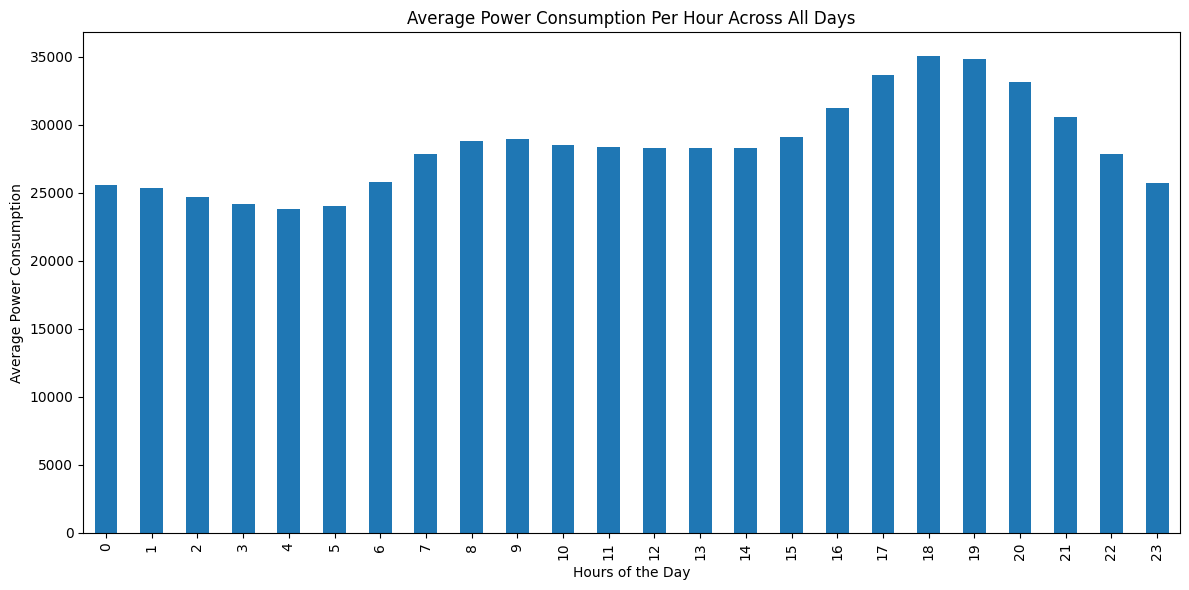

In [179]:
avg_power = merged_csv.groupby('Hour')['ROLLING SYSTEM DEMAND'].mean()
plt.figure(figsize=(12,6))
avg_power.plot(kind = 'bar')
plt.title ('Average Power Consumption Per Hour Across All Days')
plt.ylabel('Average Power Consumption')
plt.xlabel('Hours of the Day')
plt.tight_layout()
plt.show()

#### Bar Chart that shows 24* number of days and average or sum for each hour.

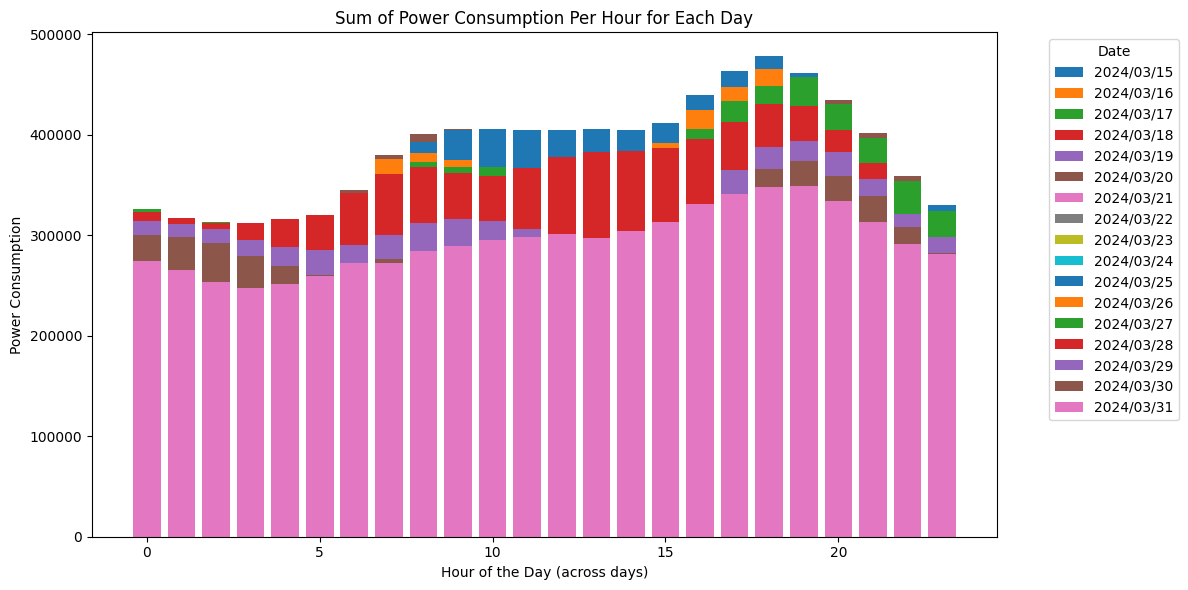

In [180]:
sum_hourly = merged_csv.groupby(['Date', 'Hour'])['ROLLING SYSTEM DEMAND'].sum().reset_index()

plt.figure(figsize=(12,6))
for day in sum_hourly['Date'].unique():
    day_data = sum_hourly[sum_hourly['Date'] == day]
    plt.bar(
        x=day_data['Hour'] + (pd.to_datetime(day_data['Date']) - pd.to_datetime(day_data['Date'].min())).dt.days * 24,
        height=day_data['ROLLING SYSTEM DEMAND'],
        label = day
    )


plt.title('Sum of Power Consumption Per Hour for Each Day')
plt.ylabel('Power Consumption')
plt.xlabel('Hour of the Day (across days)')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()